In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
# Load the dataset
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# VAlue count of spam and ham
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [33]:
# Create train test split
X_train,X_test,y_train,y_test = train_test_split(df.Message,df.Category,test_size=0.2,random_state=42)

In [40]:
# One hot encoder can only be used in catagories 
X_train.values

array(['Reply to win £100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service',
       'Hello. Sort of out in town already. That . So dont rush home, I am eating nachos. Will let you know eta.',
       'How come guoyang go n tell her? Then u told her?', ...,
       "Prabha..i'm soryda..realy..frm heart i'm sory",
       'Nt joking seriously i told',
       'Did he just say somebody is named tampa'],
      shape=(4457,), dtype=object)

In [35]:
# import Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
vertorization = CountVectorizer()
X_train_v = vertorization.fit_transform(X_train.values)
X_test_v = vertorization.transform(X_test.values)

X_train_v

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 59275 stored elements and shape (4457, 7701)>

In [36]:
X_test_v.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1115, 7701))

In [37]:
# from navie bytes import MultinoialNB, GussianNM
from sklearn.naive_bayes import MultinomialNB
M_NB = MultinomialNB()
M_NB.fit(X_train_v,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [38]:
# Y_preads
y_preds = M_NB.predict(X_test_v)
y_preds

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'],
      shape=(1115,), dtype='<U4')

In [41]:
# Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



<Axes: >

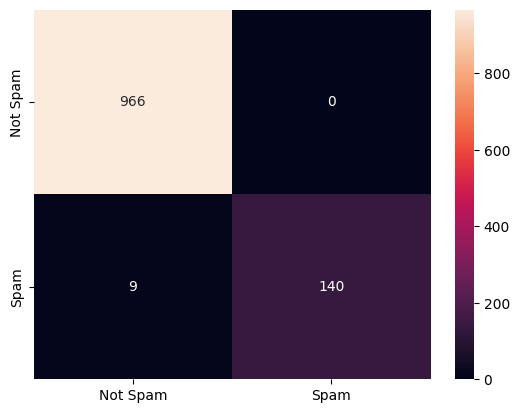

In [47]:
# Confusion matrix
cm = confusion_matrix(y_test,y_preds)
sns.heatmap(cm,annot=True,fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

In [49]:
# Create pipeline
pipeline = Pipeline([
    ('vectorization',CountVectorizer()),
    ('M_NB',MultinomialNB())
])
pipeline

,steps,"[('vectorization', ...), ('M_NB', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [50]:
pipeline.fit(X_train,y_train)

,steps,"[('vectorization', ...), ('M_NB', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [52]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

